# Ryan Shearer          24695394

## Part 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


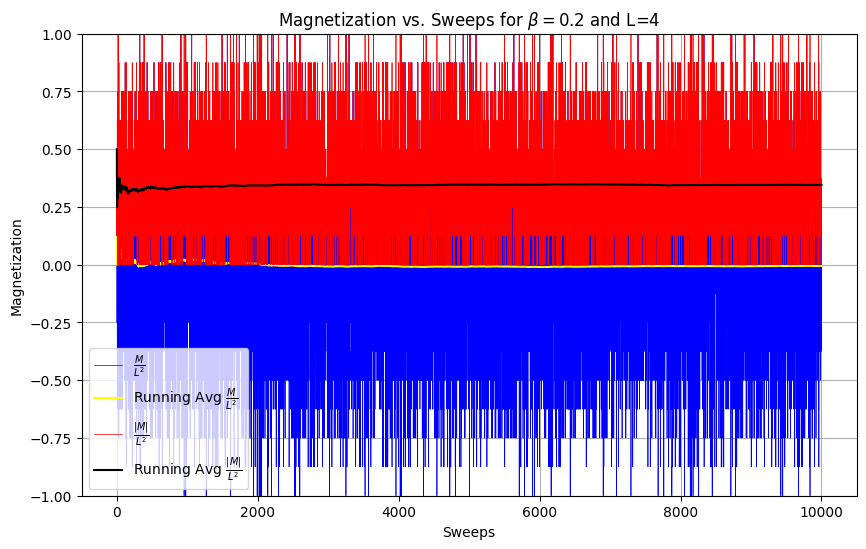

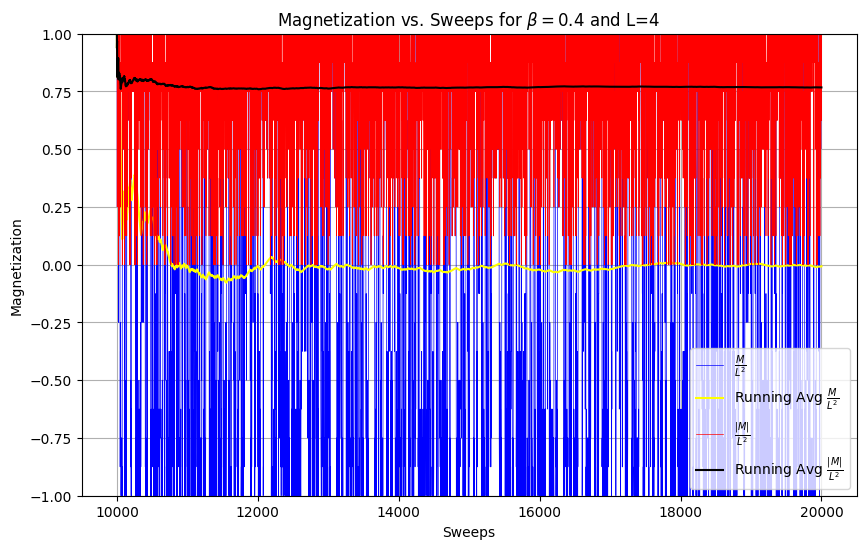

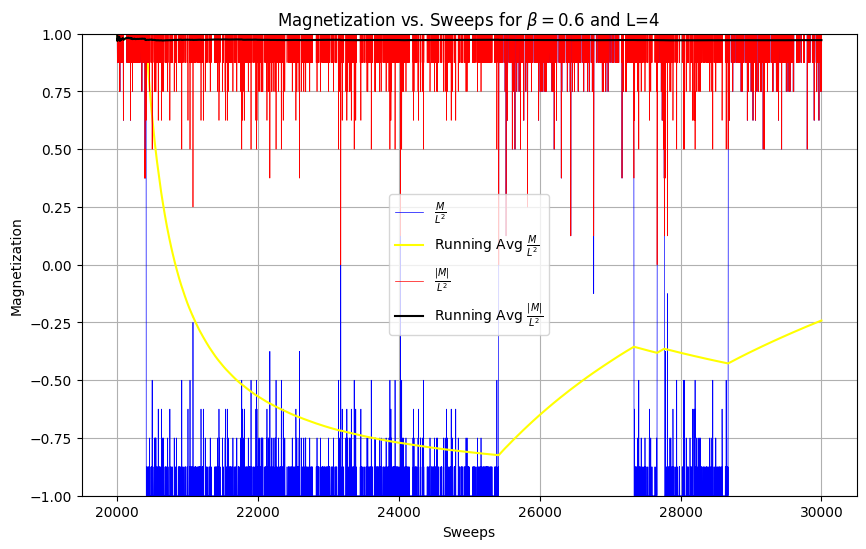

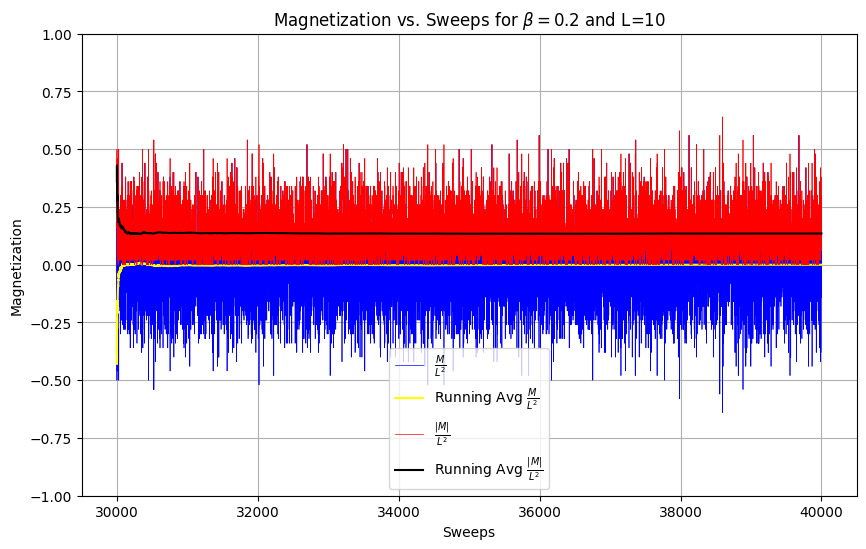

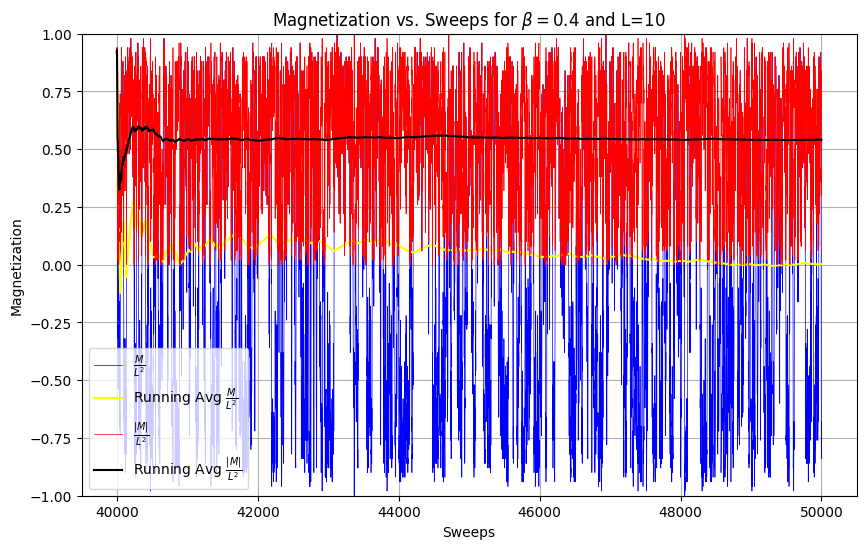

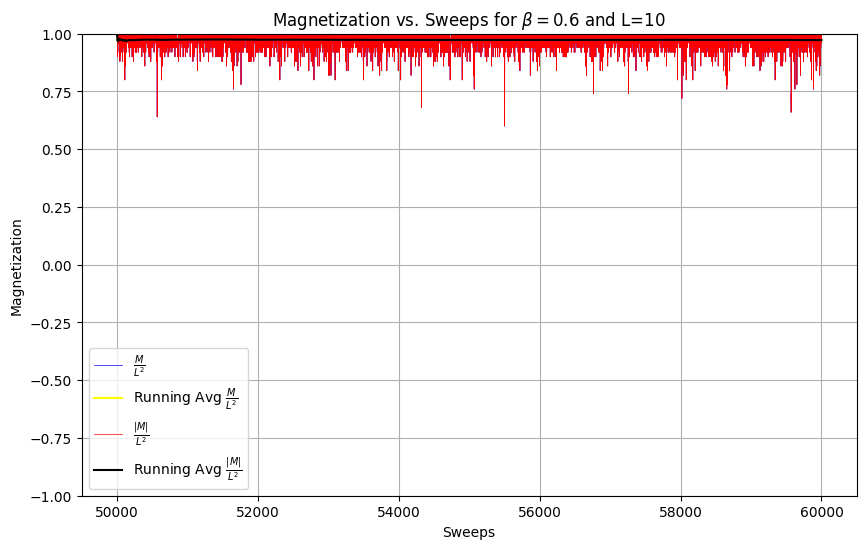

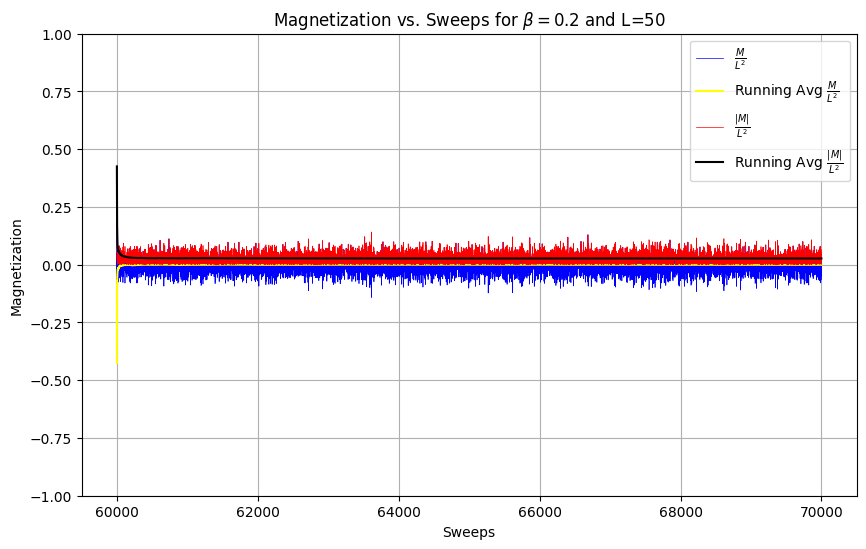

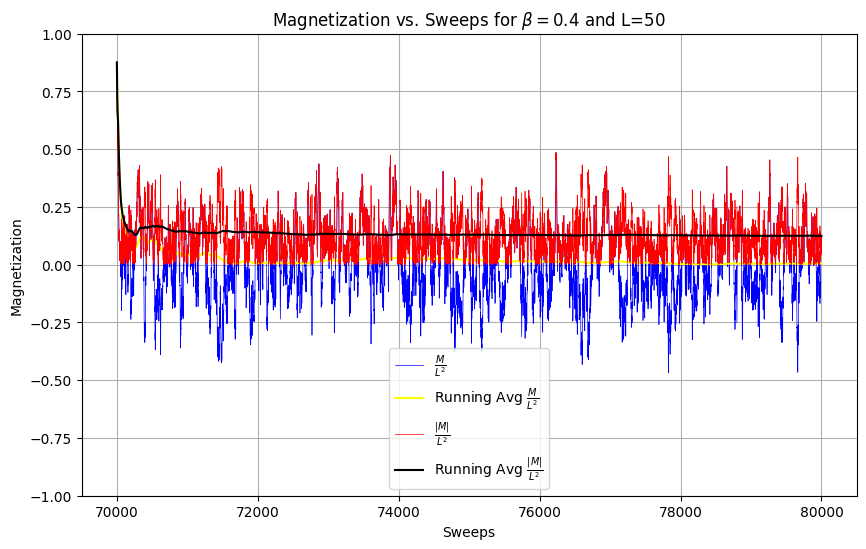

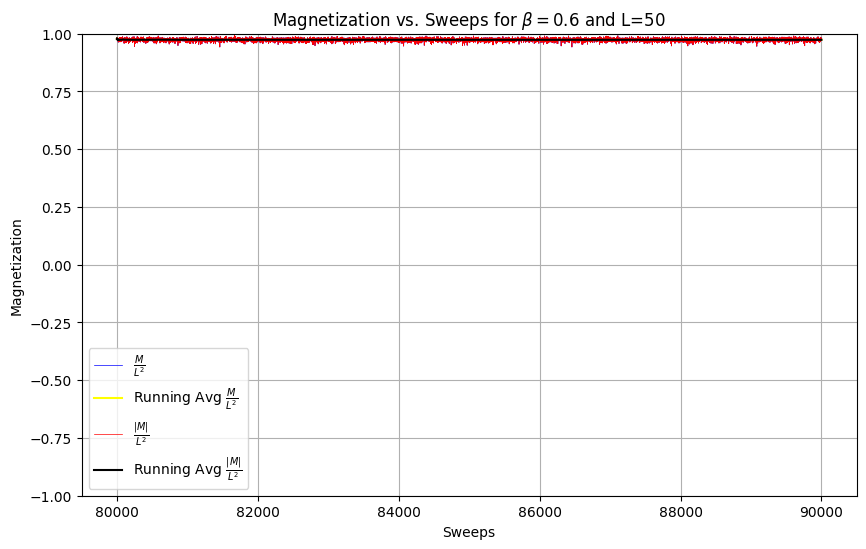

In [4]:

# Load data from CSV
data = pd.read_csv("data.csv")

# Function to plot M/L^2 and |M|/L^2 vs. sweeps for a given beta and L
def plot_magnetization_vs_sweeps(beta, L):
    #subset = data[data['Beta'] == beta].copy()
    subset = data[(data['Beta'] == beta) & (data['L'] == L)].copy()


    # Calculate running averages
    subset['M_avg'] = np.cumsum(subset['M']) / np.arange(1, len(subset) + 1)
    subset['M_abs_avg'] = np.cumsum(subset['|M|']) / np.arange(1, len(subset) + 1)

    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(subset['M'] / (L*L), label='$\\frac{M}{{L^2}}$', color='blue',linewidth=0.5)
    plt.plot(subset['M_avg'] / (L*L), label='Running Avg $\\frac{M}{{L^2}}$', color='yellow')

    plt.plot(subset['|M|'] / (L*L), label='$\\frac{|M|}{{L^2}}$', color='red',linewidth=0.5)
    plt.plot(subset['M_abs_avg'] / (L*L), label='Running Avg $\\frac{|M|}{{L^2}}$', color='black')

    
    plt.xlabel('Sweeps')
    plt.ylabel('Magnetization')
    plt.ylim(-1,1)
    plt.title(f'Magnetization vs. Sweeps for $\\beta={beta}$ and L={L}')

    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for different values of L and Beta
L_values = [4, 10, 50]
Beta_values = [0.2,0.4,0.6]

for L in L_values:
    for beta in Beta_values:
        plot_magnetization_vs_sweeps(beta, L)




## Part 2

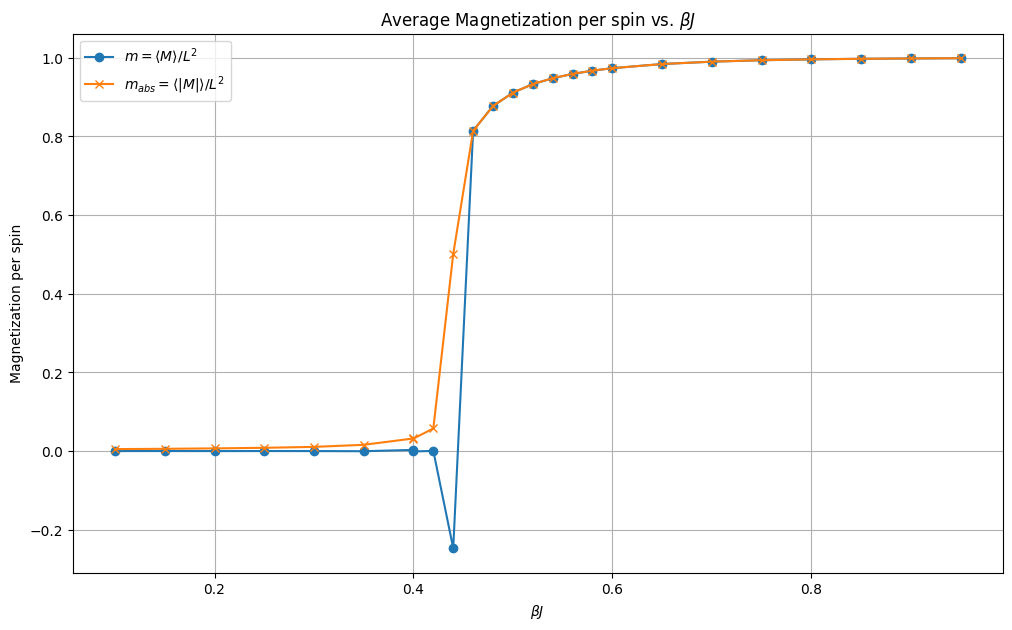

In [5]:
L = 200

averages_data = pd.read_csv("averages_part2.csv")

averages_data.columns = ['L', 'Beta', '<E>', '<E2>', '<M>','<|M|>', '<M2>']

# Filtering data for L = 200 as specified in Part 2 of the assignment
subset = averages_data[averages_data['L'] == 200].copy()


# Computing average magnetization per spin and average absolute magnetization per spin
subset['m'] = subset['<M>'] / (L ** 2)
subset['m_abs'] = (subset['<|M|>']) / (L ** 2)

# Plotting
plt.figure(figsize=(12, 7))
plt.plot(subset['Beta'], subset['m'], label=r'$m = \langle M \rangle / L^2$', marker='o')
plt.plot(subset['Beta'], subset['m_abs'], label=r'$m_{abs} = \langle |M| \rangle / L^2$', marker='x')
plt.xlabel(r'$\beta J$')
plt.ylabel('Magnetization per spin')
plt.title('Average Magnetization per spin vs. ' + r'$\beta J$')
plt.legend()
plt.grid(True)
plt.show()

## Part 3

     L  Beta       <E>          <E2>   <M>   <|M|>       <M2>
0  200  0.10  -8127.17  6.613087e+07 -0.06  199.26   62386.01
1  200  0.15 -12452.34  1.551529e+08  1.41  226.99   81054.07
2  200  0.20 -17133.11  2.936404e+08 -3.83  269.67  112774.54
3  200  0.25 -22289.58  4.969360e+08  6.21  329.33  168581.15
4  200  0.30 -28177.79  7.941150e+08  3.23  428.56 -141114.23
     L  Beta       <E>          <E2>   <M>   <|M|>       <M2>      N  \
0  200  0.10  -8127.17  6.613087e+07 -0.06  199.26   62386.01  40000   
1  200  0.15 -12452.34  1.551529e+08  1.41  226.99   81054.07  40000   
2  200  0.20 -17133.11  2.936404e+08 -3.83  269.67  112774.54  40000   
3  200  0.25 -22289.58  4.969360e+08  6.21  329.33  168581.15  40000   
4  200  0.30 -28177.79  7.941150e+08  3.23  428.56 -141114.23  40000   

        c/k         χ  
0  0.019994  0.155965  
1  0.051810  0.303945  
2  0.096913  0.563799  
3  0.172795  1.053391  
4  0.286079 -1.058435  
     L  Beta       <E>          <E2>   <M>   <|M|> 

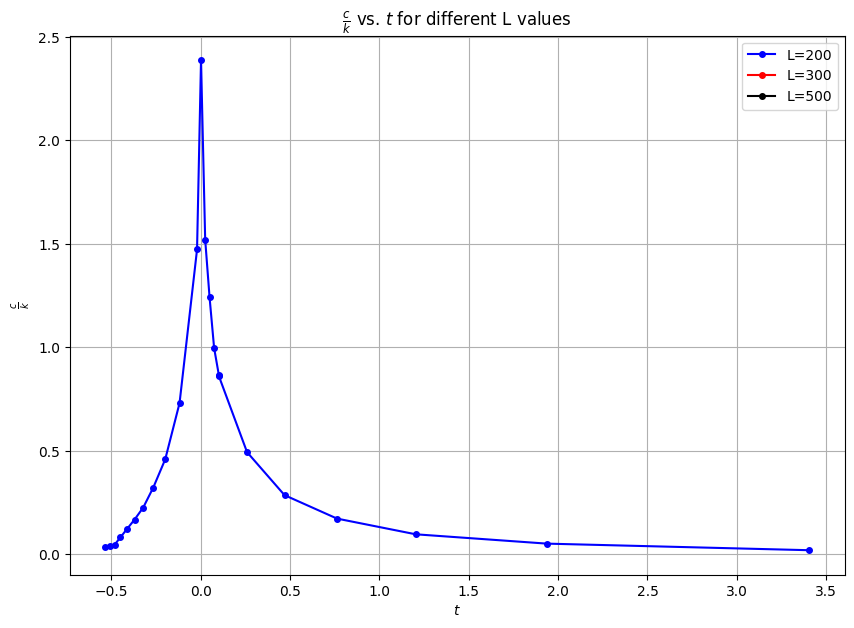

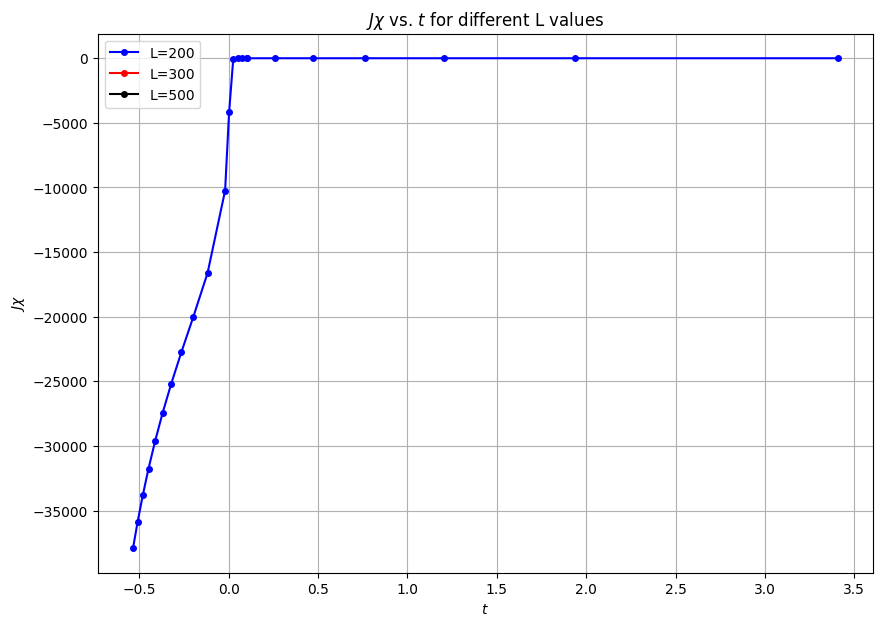

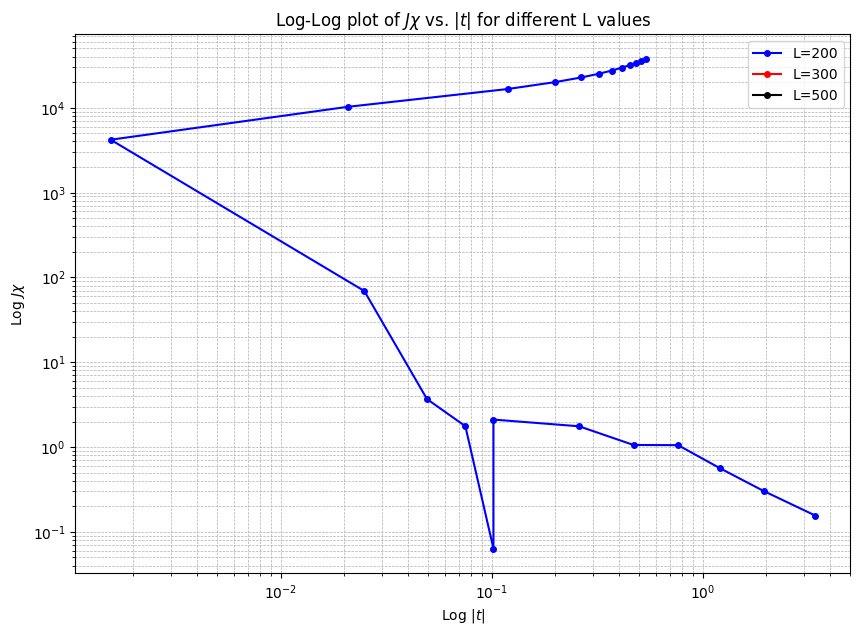

In [6]:
#TODO: divide jx and c/k by N?
kTc =  2 / math.log(1 + math.sqrt(2))
data_part3 = pd.read_csv("averages_part3.csv")

# Display the first few rows of the data to understand its structure
print(data_part3.head())

data_part3['N'] = data_part3['L']**2

# Calculate the system's specific heat c/k
data_part3['c/k'] = data_part3['Beta']**2 * (data_part3['<E2>'] - data_part3['<E>']**2) / data_part3['N']

# Calculate the magnetic susceptibility χ
data_part3['χ'] = data_part3['Beta'] * (data_part3['<M2>'] - data_part3['<M>']**2) / data_part3['N']

# Display the first few rows of the updated data
print(data_part3.head())


# Calculate t for the provided data
data_part3['t'] = (1 / (data_part3['Beta'] * kTc)) - 1

# Display the first few rows of the updated data
print(data_part3.head())
# Assuming J = 1, compute Jχ for the provided data
data_part3['Jχ'] = data_part3['χ']

# Define a function to plot c/k and Jχ as functions of t
def plot_analysis(data):
    # Define colors for different L values
    colors = {
        200: 'blue',
        300: 'red',
        500: 'black'
    }
    
    # Plot c/k vs. t for different L values
    plt.figure(figsize=(10, 7))
    for L, color in colors.items():
        subset = data[data['L'] == L]
        plt.plot(subset['t'], subset['c/k'], 'o-', color=color, markersize=4, label=f'L={L}')

    
    plt.title(r'$\frac{c}{k}$ vs. $t$ for different L values')
    plt.xlabel('$t$')
    plt.ylabel(r'$\frac{c}{k}$')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot Jχ vs. t for different L values
    plt.figure(figsize=(10, 7))
    for L, color in colors.items():
        subset = data[data['L'] == L]
        plt.plot(subset['t'], subset['Jχ'], 'o-', color=color, markersize=4, label=f'L={L}')

    plt.title('$J\chi$ vs. $t$ for different L values')
    plt.xlabel('$t$')
    plt.ylabel('$J\chi$')
    plt.legend()
    plt.grid(True)
    plt.show()
    

    # Log-log plot of Jχ vs. |t| for different L values
    plt.figure(figsize=(10, 7))
    for L, color in colors.items():
        subset = data[data['L'] == L]
        plt.loglog(np.abs(subset['t']), np.abs(subset['Jχ']), 'o-', color=color, markersize=4, label=f'L={L}')

    
    plt.title('Log-Log plot of $Jχ$ vs. $|t|$ for different L values')
    plt.xlabel('Log $|t|$')
    plt.ylabel('Log $Jχ$')
    plt.legend()
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.show()

# Generate the plots using the concise function
plot_analysis(data_part3)




## Part 4

In [7]:
from scipy.optimize import curve_fit

#TODO: fix the calculation of g(r)

# # Load the data
# data = pd.read_csv("data_part4.csv")

# # Function to fit the data
# def exp_func(r, xi):
#     return np.exp(-r/xi)

# # Lists to store results
# betas = []
# correlation_lengths = []

# # Loop through unique beta values
# for beta in data['Beta'].unique():
#     subset = data[data['Beta'] == beta]
    
#     # Calculate magnetization m
#     m = subset['M'].mean() / (L**2)
    
#     # Compute g(r)
#     subset['g(r)'] = subset['G(r)'] - m**2
    
#     # Fit the data
#     popt, _ = curve_fit(exp_func, subset['r'], subset['g(r)'])
#     xi = popt[0]
    
#     betas.append(beta)
#     correlation_lengths.append(xi)
    
#     # Plot G(r) and g(r)
#     plt.figure()
#     plt.plot(subset['r'], subset['G(r)'], 'o-', label='G(r)')
#     plt.plot(subset['r'], subset['g(r)'], 'x-', label='g(r)')
#     plt.title(f"Beta = {beta}")
#     plt.legend()
#     plt.show()

# # Plot correlation length xi as a function of beta
# plt.figure()
# plt.plot(betas, correlation_lengths, 'o-')
# plt.title('Correlation Length vs. Beta')
# plt.xlabel('Beta')
# plt.ylabel('Correlation Length xi')
# plt.show()

# Unique Beta values
betas = G_r_values['Beta'].unique()

# Plot G(r) and g(r) for different temperatures
plt.figure(figsize=(12, 6))

for beta in betas:
    subset = G_r_values[G_r_values['Beta'] == beta]
    plt.plot(subset['r'], subset['G(r)'], label=f'G(r) for Beta={beta}')
    plt.plot(subset['r'], subset['g(r)'], label=f'g(r) for Beta={beta}', linestyle='--')

plt.xlabel('r (Distance)')
plt.ylabel('Function Value')
plt.title('G(r) and g(r) vs. Distance r')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


def exp_decay(r, a, xi):
    return a * np.exp(-r/xi)

xi_values = {}

for beta in betas:
    subset = G_r_values[G_r_values['Beta'] == beta]
    
    try:
        popt, _ = curve_fit(exp_decay, subset['r'], subset['g(r)'])
        xi_values[beta] = popt[1]
    except:
        xi_values[beta] = np.nan


# Plot xi as a function of Beta
plt.figure(figsize=(10, 5))
plt.plot(list(xi_values.keys()), list(xi_values.values()), '-o', color='blue')
plt.xlabel('Beta')
plt.ylabel('Correlation Length (xi)')
plt.title('Correlation Length vs. Beta')
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'G_r_values' is not defined